In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.shape

(30, 2)

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\saurav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

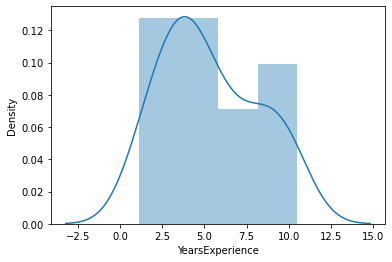

In [7]:
sns.distplot(df.YearsExperience)

C:\Users\saurav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

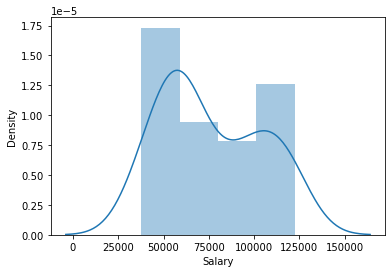

In [8]:
sns.distplot(df.Salary)

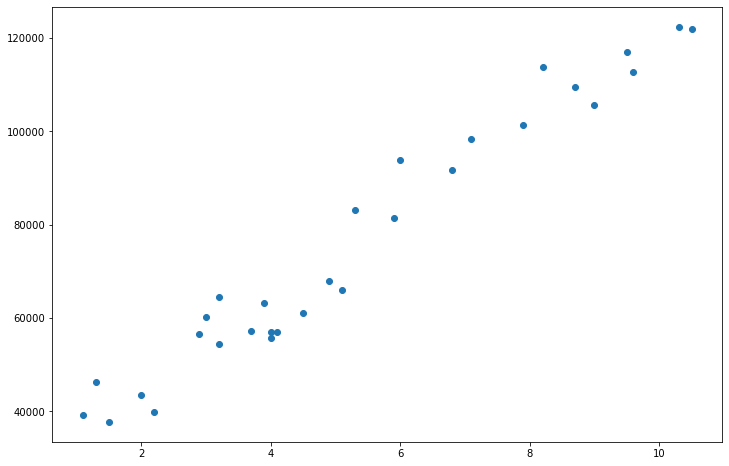

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(df.YearsExperience, df.Salary)

In [10]:
df.rename(columns = {'YearsExperience':'Yearexperience'}, inplace=True)

In [11]:
import statsmodels.formula.api as smf

In [12]:
model = smf.ols("Salary ~ Yearexperience", data = df).fit()

In [13]:
## model.visualization
import seaborn as sns

<AxesSubplot:xlabel='Yearexperience', ylabel='Salary'>

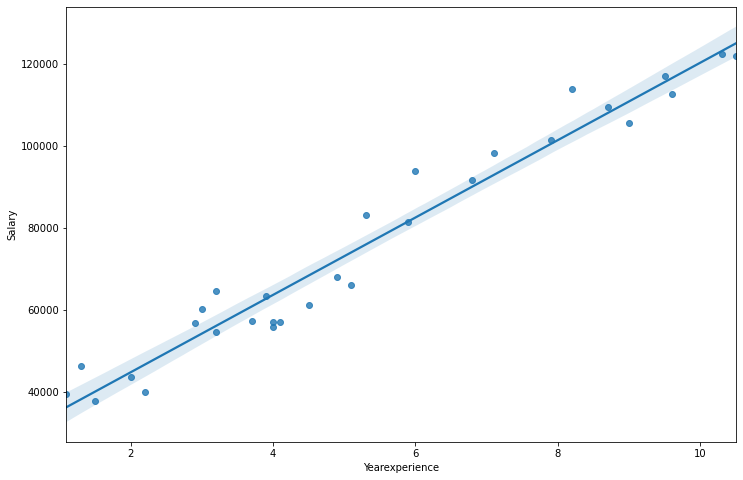

In [14]:
plt.figure(figsize=(12,8))
sns.regplot(x='Yearexperience', y= 'Salary', data=df)

In [15]:
print(model.tvalues, '\n', model.pvalues)

Intercept         11.346940
Yearexperience    24.950094
dtype: float64 
 Intercept         5.511950e-12
Yearexperience    1.143068e-20
dtype: float64


In [16]:
model.rsquared

0.9569566641435086

In [17]:
model.rsquared_adj

0.9554194021486339

In [18]:
model.params

Intercept         25792.200199
Yearexperience     9449.962321
dtype: float64

In [19]:
df_salary = df.Salary.head()

In [20]:
df.head()

,Yearexperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
data = pd.Series([1.1])

In [22]:
new_data = pd.DataFrame({'Yearexperience':[1.1,1.3,1.5,15]})

In [23]:
model.predict(new_data)

0     36187.158752
1     38077.151217
2     39967.143681
3    167541.635020
dtype: float64

In [24]:
new_data

,Yearexperience
0,1.1
1,1.3
2,1.5
3,15.0


## LinnearRegression without Transformation

In [25]:
## by Linear regression 
from sklearn.linear_model import LinearRegression

In [32]:
x = pd.DataFrame(df.Yearexperience)
y = pd.DataFrame(df.Salary)

In [27]:
mod = LinearRegression()


In [33]:
mod.fit(x, y)

LinearRegression()

In [34]:
pred = mod.predict(x)

In [39]:
pridict_actual = pd.DataFrame(np.round(pred,2), columns=['pridict'])
pridict_actual['actual'] = y

In [40]:
pridict_actual[:10]

,pridict,actual
0,36187.16,39343.0
1,38077.15,46205.0
2,39967.14,37731.0
3,44692.12,43525.0
4,46582.12,39891.0
5,53197.09,56642.0
6,54142.09,60150.0
7,56032.08,54445.0
8,56032.08,64445.0
9,60757.06,57189.0


In [42]:
print('Exponentional model Intercept value is: ', mod.intercept_)
print('co-efficient model Intercept value is: ', mod.coef_)

Exponentional model Intercept value is:  [25792.20019867]
co-efficient model Intercept value is:  [[9449.96232146]]


In [44]:
from sklearn import metrics

In [45]:
print("Mean absolute error: ", metrics.mean_absolute_error(y, pred))
print("Mean squared error: ", metrics.mean_squared_error(y, pred))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y, pred)))
print("R^2: ", metrics.r2_score(y, pred))


Mean absolute error:  4644.2012894435375
Mean squared error:  31270951.722280968
Root mean square error:  68.14837701254181
R^2:  0.9569566641435086


## Logirthm Transformation

In [46]:
x_log = np.log(df.Yearexperience.values.reshape(-1,1))
y_log = df.Salary.values.reshape(-1,1)

In [48]:
log_model = LinearRegression()

In [50]:
log_model.fit(x_log, y_log)

LinearRegression()

In [51]:
log_model_pred = log_model.predict(x_log)

In [53]:
predict_actual2 = pd.DataFrame(log_model_pred, columns=['predict'])

In [54]:
predict_actual2['actual'] = y_log

In [55]:
predict_actual2[:10]

,predict,actual
0,18795.848339,39343.0
1,25575.235192,46205.0
2,31382.551905,37731.0
3,43057.262306,43525.0
4,46925.138875,39891.0
5,58136.050079,56642.0
6,59511.842441,60150.0
7,62130.943929,54445.0
8,62130.943929,64445.0
9,68022.718504,57189.0


In [56]:
print('Exponentional model Intercept value is: ', log_model.intercept_)
print('co-efficient model Intercept value is: ', log_model.coef_)

Exponentional model Intercept value is:  [14927.97177006]
co-efficient model Intercept value is:  [[40581.98795978]]


In [57]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_log, log_model_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_log, log_model_pred))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y_log, log_model_pred)))
print("R^2: ", metrics.r2_score(y_log, log_model_pred))

Mean absolute error:  8443.584664486356
Mean squared error:  106149618.72183877
Root mean square error:  91.88898010363569
R^2:  0.853888882875697


## Expotential Transformation

In [59]:
x_ex_log = df.Yearexperience.values.reshape(-1,1)
y_ex_log = np.log(df.Salary.values.reshape(-1,1))

In [60]:
ex_model = LinearRegression()

In [61]:
ex_model.fit(x_ex_log, y_ex_log)

LinearRegression()

In [62]:
ex_model_pred = ex_model.predict(x_ex_log)

In [64]:
predict_actual3 = pd.DataFrame(ex_model_pred, columns=['ex_model_pred'])

In [65]:
predict_actual3['actual'] = y_ex_log

In [66]:
predict_actual3[:10]

,ex_model_pred,actual
0,10.645400,10.580073
1,10.670491,10.740843
2,10.695581,10.538237
3,10.758308,10.681091
4,10.783398,10.593906
5,10.871215,10.944506
6,10.883761,11.004597
7,10.908851,10.904946
8,10.908851,11.073567
9,10.971578,10.954117


In [67]:
print('Exponentional model Intercept value is: ', ex_model.intercept_)
print('co-efficient model Intercept value is: ', ex_model.coef_)

Exponentional model Intercept value is:  [10.5074019]
co-efficient model Intercept value is:  [[0.12545289]]


In [72]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_ex_log, ex_model_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_ex_log, ex_model_pred))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y_ex_log, ex_model_pred)))
print("R^2: ", metrics.r2_score(y_ex_log, ex_model_pred))

Mean absolute error:  0.07981492426092208
Mean squared error:  0.00894431117203029
Root mean square error:  0.28251535225704477
R^2:  0.9319671194084195
